# Assignment#2 Image Segmentation

## Problem Statement
We intend to perform image segmentation. Image segmentation means that we can group
similar pixels together and give these grouped pixels the same label. The grouping
problem is a clustering problem. We want to study the use of K-means on the Berkeley
Segmentation Benchmark. Below we will show the needed steps to achieve the goal of
the assignment.

In [62]:
#Reset Variables if memory goes crucial.
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [98]:
#imports cell 
from os import listdir
from PIL import Image as PImage
from PIL import ImageColor as PColor
from random import randint
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from MLalgorithms.clustering import kmeans

## Step 1 : Download the dataset and understand the format

In [77]:
#Utility Method to loadImages into list and their corresponding ground truth from a given path parameter.
def LoadImagesWithGroundTruth(imgs_path, groundTruth_path):
    # return array of images
    loadedImages = []
    loadedMatFiles = []
    #i =0
    imagesList = listdir(imgs_path)
    for image in imagesList:
        mat = scipy.io.loadmat(groundTruth_path+image[:-4])
        img = PImage.open(imgs_path + image)
        loadedImages.append(np.array(img))
        for j in range(0,mat['groundTruth'].shape[1]):
            loadedMatFiles.append(mat['groundTruth'][0][j][0][0][0])
    return loadedImages,loadedMatFiles

In [78]:
train_path = "./data/images/train/"
test_path = "./data/images/test/"
val_path = "./data/images/val/"
gt_train_path = "./data/groundTruth/train/"
gt_test_path = "./data/groundTruth/test/"
gt_val_path = "./data/groundTruth/val/"
# store images in lists.
train_imgs, train_gt = LoadImagesWithGroundTruth(train_path,gt_train_path)
test_imgs, test_gt = LoadImagesWithGroundTruth(test_path,gt_test_path)
val_imgs, val_gt = LoadImagesWithGroundTruth(val_path,gt_val_path)
print("Length of Trainset = ",len(train_imgs),"\nLength of Testset = ",len(test_imgs),"\nLength of Validationset = ",len(val_imgs))
print("Length of GroundTruth for Trainset = ",len(train_gt),"\nLength of GroundTruth for Testset = ",len(test_gt),"\nLength of GroundTruth for Validationset = ",len(val_gt))

Length of Trainset =  200 
Length of Testset =  200 
Length of Validationset =  100
Length of GroundTruth for Trainset =  1087 
Length of GroundTruth for Testset =  1063 
Length of GroundTruth for Validationset =  546


## Step 2: Visualize the image and the ground truth segmentation

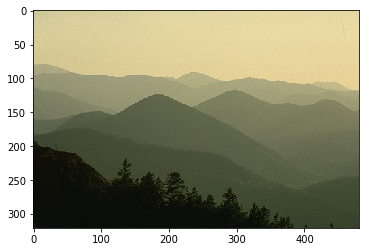

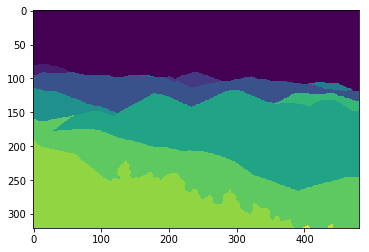

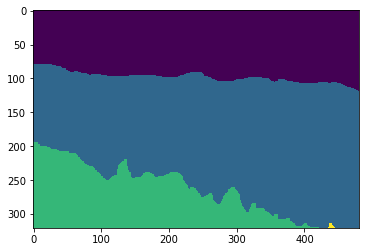

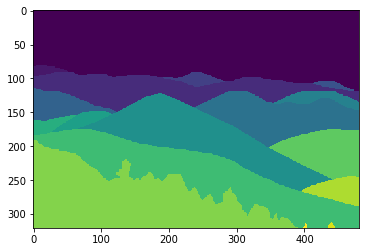

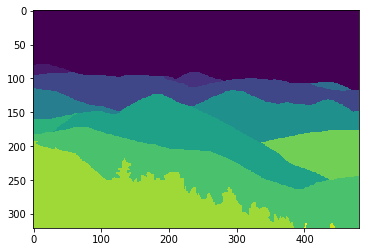

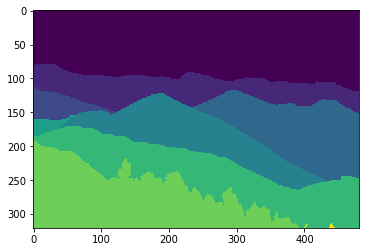

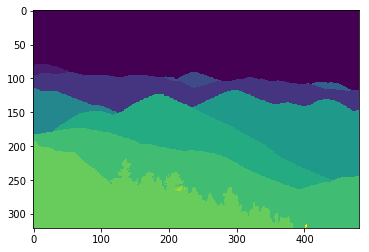

In [79]:
plt.imshow(train_imgs[1]);
plt.figure();
plt.imshow(train_gt[5]);
plt.figure();
plt.imshow(train_gt[6]);
plt.figure();
plt.imshow(train_gt[7]);
plt.figure();
plt.imshow(train_gt[8]);
plt.figure();
plt.imshow(train_gt[9]);
plt.figure();
plt.imshow(train_gt[10]);

## Step 3: Segmentation using K-means

#### Every image pixel is a feature vector of 3-dimension {R,G,B}. We will use this feature representation to do the segmentation.

In [80]:
num_pixels = 321 * 481
num_dimen = 3
num_imgs = len(train_imgs)
num_val = len(val_imgs)
train_set = np.arange(num_pixels * num_dimen * num_imgs).reshape(num_pixels * num_imgs, num_dimen) 
test_set = np.arange(num_pixels * num_dimen * num_imgs).reshape(num_pixels * num_imgs, num_dimen)
val_set = np.arange(num_pixels * num_dimen * num_val).reshape(num_pixels * num_val, num_dimen) 
#transform the train and test image matrices to the correct shape.
for i in range(num_imgs):
    train_set[num_pixels*i:num_pixels+(num_pixels*i),:] = train_imgs[i].reshape(num_pixels,num_dimen)
    test_set[num_pixels*i:num_pixels+(num_pixels*i),:] = test_imgs[i].reshape(num_pixels,num_dimen)

#transform the validation image matrixes to the correct shape. 
for i in range(num_val):
    val_set[num_pixels*i:num_pixels+(num_pixels*i), 0:num_dimen] = val_imgs[i].reshape(num_pixels,num_dimen)

#### We will change the K of the K-means algorithm between {3,5,7,9,11} clusters. You will produce different segmentations and save them as colored images. Every color represents a certain group (cluster) of pixels.

In [82]:
#for k in range(3,5,7,9,11):   
centroids, clusters,error,itern = kmeans(train_set,num_clusters=3)

In [111]:
np.array([randint(0, 255),randint(0, 255),randint(0, 255)])
clusterised_mat= np.zeros((train_set.shape))
clusterised_mat

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [124]:
def ClusteriseImage(clusters,data_mat,cluster_num):
    clusterised_mat= np.zeros(data_mat.shape,dtype=np.uint8)
    colors = []
    for i in range(cluster_num):
        colors.append(np.array([randint(0, 255),randint(0, 255),randint(0, 255)]))
    for i in range(data_mat.shape[0]):
        clusterised_mat[i] = colors[clusters[i]]
    return clusterised_mat
    

In [125]:
clusterised_mat=ClusteriseImage(clusters,train_set,3)

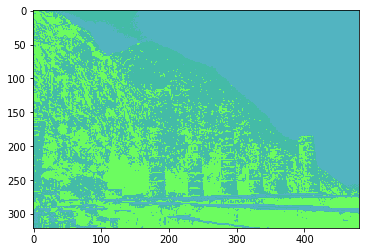

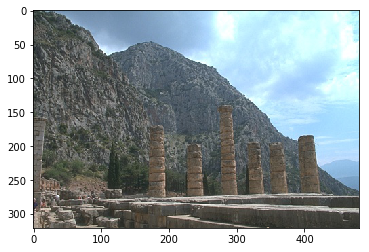

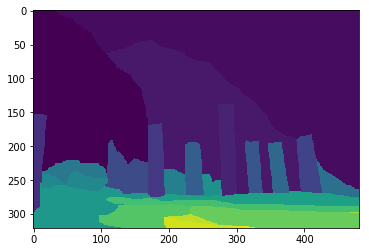

In [137]:
plt.imshow(clusterised_mat[0:481*321,:].reshape(321,481,3))
plt.figure()
plt.imshow(train_imgs[0])
plt.figure()
plt.imshow(train_gt[4])

array([[[199, 192, 148],
        [203, 199, 154],
        [201, 197, 152],
        ...,
        [231, 218, 166],
        [233, 220, 168],
        [231, 215, 163]],

       [[201, 194, 150],
        [206, 199, 155],
        [204, 200, 153],
        ...,
        [231, 218, 166],
        [233, 220, 168],
        [229, 213, 161]],

       [[202, 195, 149],
        [206, 199, 153],
        [206, 199, 153],
        ...,
        [231, 218, 166],
        [229, 216, 164],
        [233, 217, 165]],

       ...,

       [[ 25,  19,   7],
        [ 16,  10,   0],
        [ 20,  16,   5],
        ...,
        [ 54,  63,  42],
        [ 57,  66,  45],
        [ 58,  68,  44]],

       [[ 16,  10,   0],
        [ 20,  14,   2],
        [ 34,  30,  19],
        ...,
        [ 54,  63,  42],
        [ 57,  66,  45],
        [ 55,  65,  41]],

       [[ 26,  20,   6],
        [ 26,  20,   6],
        [ 35,  29,  15],
        ...,
        [ 53,  63,  39],
        [ 51,  61,  37],
        [ 57,  67,  43]]

#### We will evaluate the result segmentation using F-measure, Conditional Entropy for image I with M available ground-truth segmentations and for a clustering of K-clusters you will report your measures M times and the average of the M trials as well. <br>Report average per dataset as well.

In [84]:
print(clusters)

[2 2 2 ... 2 2 2]
